<a href="https://colab.research.google.com/github/reidzf8/PreprocessingData/blob/main/Pertemuan_4_Penambangan_Data_Tugas_Preprosesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Preprocessing Data
1. a. Download dataset produk_elektronik.csv yang ada pada link berikut
https://bit.ly/dataprodukelektronik
b. Tampilkan informasi tipe data setiap kolom dan cek apakah ada missing values.
2. a. Cek missing values pada dataset. Berapa jumlah missing values di setiap kolom?
b. Jelaskan bagaimana keberadaan missing values dapat memengaruhi analisis data.
c. Tentukan metode yang paling sesuai untuk menangani missing values di setiap
kolom. Berikan alasan pemilihan metode tersebut.
d. Tangani missing values dengan metode yang sesuai
3. a. Identifikasi outlier dalam dataset
b. Apa dampak dari keberadaan outlier terhadap analisis?
c. Pilih metode yang sesuai untuk menangani outlier dan jelaskan alasan pemilihannya.
d. Tangani outlier dengan metode yang sesuai, atau jika memilih tidak menangani
outlier berikan alasannya.
4. a. Tentukan kolom mana yang memerlukan encoding.
b. Bandingkan berbagai metode encoding dan pilih metode yang paling sesuai untuk
setiap kolom. Jelaskan alasan pemilihan metode tersebut.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


1.   Manggil Data Produk_elektronik.csv
2.   dan Menampilkannya

In [69]:
# manggillah datnya
data = pd.read_csv('produk_elektronik.csv')
data.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


In [70]:
# data terakhir
data.tail(20)

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
530,531,Produk_531,Headphone,703.0,4.4,153.0,France
531,532,Produk_532,Tablet,489.0,3.0,81.0,Canada
532,533,Produk_533,Tablet,-5.0,NaN,138.0,Canada
533,534,Produk_534,Headphone,759.0,4.6,373.0,India
534,535,Produk_535,Smartwatch,788.0,4.2,270.0,China
535,536,Produk_536,Tablet,119.0,3.7,12.0,South Korea
536,537,Produk_537,Smartphone,535.0,4.8,458.0,France
537,538,Produk_538,Smartphone,777.0,NaN,397.0,Germany
538,539,Produk_539,Laptop,746.0,3.5,113.0,Japan
539,540,Produk_540,Tablet,667.0,4.3,492.0,France


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


In [72]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [73]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


In [74]:
# mengetahui jumlah missing value
data.isnull().sum().sum()

100

### No 2
A. Berikut jumlah missing values di setiap kolom:
- harga: 30 missing values
- rating: 50 missing values
- jumlah_ulasan: 20 missing values
- Kolom lainnya tidak memiliki missing values.
- Jumlah Keseluruhan: 100 missing values

B. Dampak Missing Values terhadap Analisis Data:
- Harga: Jika banyak data harga yang hilang, analisis harga rata-rata atau tren harga bisa bias.
- Rating: Jika terlalu banyak rating yang hilang, analisis kepuasan pelanggan bisa tidak akurat.
- Jumlah Ulasan: Bisa menyebabkan kesalahan dalam mengukur popularitas produk.

In [75]:
data['harga']=data['harga'].fillna(data['harga'].median())
data['rating']=data['rating'].fillna(data['rating'].median())
data['jumlah_ulasan']=data['jumlah_ulasan'].fillna(data['jumlah_ulasan'].median())

C. Metode Penanganan Missing Values:
- Harga: kolom harga ini type data float berarti ini adalah data numerik, dan nilai kolom harga tidak distribusi normal (skewed). maka dari itu menggunakan metode penangan dengan nilai Median
- Rating: Rating memiliki skala tetap (biasanya 1-5), jadi menghapus data bisa mengurangi informasi penting. Distribusi rating cenderung skewed karena lebih banyak rating tinggi dibanding rendah. Menggunakan median lebih baik karena tidak terpengaruh oleh distribusi skewed dan outlier.
- Jumlah Ulasan: Jumlah ulasan sering bersifat skewed ada produk dengan sedikit ulasan dan ada yang sangat banyak. Data bisa mengandung outlier (produk viral punya ribuan ulasan, yang lain hanya puluhan).
Menggunakan median lebih aman untuk menghindari pengaruh outlier dan distribusi skewed.

D. Merode Penangan MV yang ditentukan:
- harga: Median karena data tidak normal (skewed).
- Rating: Median lebih stabil dibanding mean karena rating cenderung skewe
- Jumlah Ulasan: Median karena jumlah ulasan cenderung tidak normal dan memiliki outlier.

In [76]:
#cek missing value
np.sum(data.isnull())

,0
produk_id,0
nama_produk,0
kategori,0
harga,0
rating,0
jumlah_ulasan,0
negara_asal,0


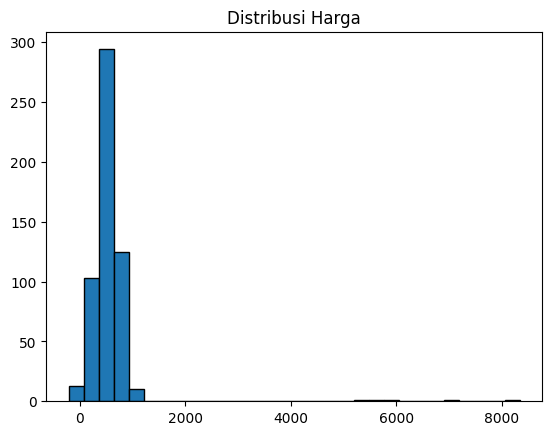

In [77]:
# cek diatribusi normal
plt.hist(data["harga"], bins=30, edgecolor="black")
plt.title("Distribusi Harga")
plt.show()

In [78]:
from scipy.stats import skew

skewness_harga = skew(data["harga"].dropna())
print(f"Skewness harga: {skewness_harga}")

Skewness harga: 9.088719778932603


In [79]:
from scipy.stats import shapiro

stat, p = shapiro(data["harga"].dropna())
print(f"P-Value: {p}")

P-Value: 1.1288491487987452e-40


In [80]:
#cek missing value
np.sum(data.isnull())

,0
produk_id,0
nama_produk,0
kategori,0
harga,0
rating,0
jumlah_ulasan,0
negara_asal,0


### NO 3

Cek Outlier Outlier dapat dideteksi menggunakan beberapa metode:
- Boxplot → Visualisasi distribusi dan outlier
- Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil


1. Identifikasi menggunakan Boxplot

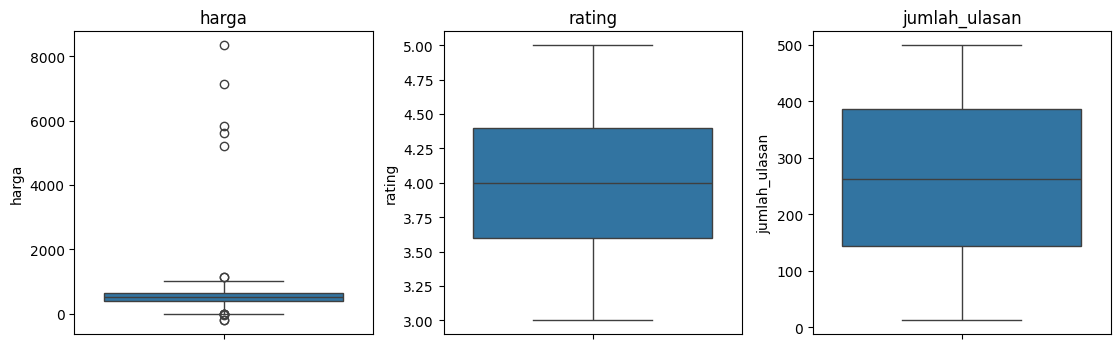

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['harga', 'rating', 'jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

2. Identifikasi outlier menggunakan IQR

In [82]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]


# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")


harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


B. Dampak outlier
- bisa menyebabkan bias dalam analisis dan prediksi.

C. Metode Penangan Outlier
- Capping (Winsorizing): Metode ini mengganti nilai outlier dengan batas tertentu (batas atas atau bawah). Tidak menghapus data, hanya membatasi ekstremnya agar tidak terlalu berpengaruh.
- Transformasi Log: Menerapkan fungsi logaritma pada data agar distribusi lebih normal dan dampak outlier berkurang. Biasanya digunakan jika data memiliki distribusi skewed (condong ke satu sisi).
- Trimming (Menghapus Outlier): Menghapus data yang berada di luar batas tertentu (misalnya berdasarkan IQR atau z-score). Menghilangkan outlier dari dataset agar analisis lebih representatif.

Memilih Metode Penangan: Capping (Winsorizing)
dengan Outlier dikolom Harga, Harga produk bisa sangat bervariasi, dari produk murah hingga premium. Sehingga menghapus outlier (trimming) bisa membuat analisis tidak mencerminkan pasar sebenarnya. Dengan capping, kita hanya mengganti nilai ekstrem dengan batas wajar, sehingga tetap mempertahankan informasi tanpa membuat data bias.

In [83]:
# Winsorizing (Mengganti Outlier)
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

D. Penerepan Metode Penanganan Capping

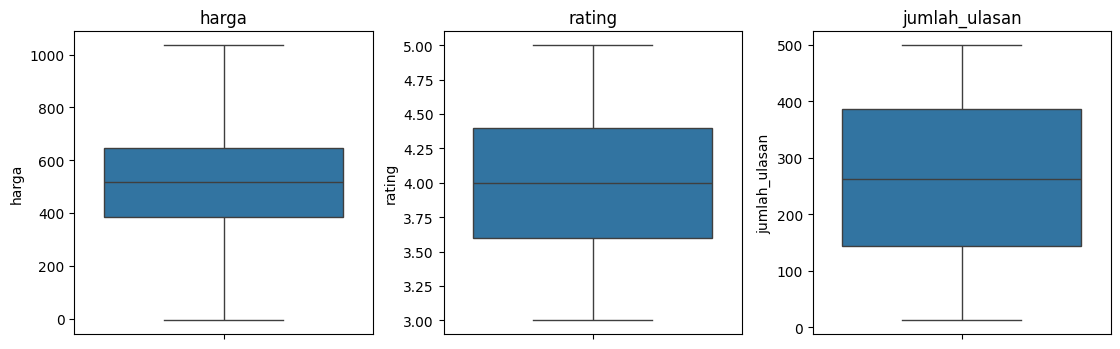

In [84]:
# Cek ulang
num_cols = ['harga', 'rating', 'jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### NO 4

#### <b>Encoding</b>
Encoding adalah proses mengubah data kategorikal menjadi bentuk numerik agar dapat digunakan dalam analisis atau model machine learning.
Ada beberapa Metode Encoding:
1. One-Hot Encoding (OHE)
2. Label Encoding
3. Ordinal Encoding
4. Target Encoding (Mean Encoding)
5. Frequency Encoding

A. Ada 3 kolom bertipe data object (kategori teks) yang dapat diencoding agar dapat digunakan dalam analisis atau model machine learning:

- kategori: berisi jenis produk (misalnya, Smartwatch, Headphone, Tablet).
- negara_asal: menunjukkan asal negara produk (misalnya, Japan, Canada, South Korea).
- nama_produk: ini adalah identifier unik untuk produk, yang biasanya tidak digunakan untuk analisis. Jadi, tidak perlu encoding.

In [85]:
data['kategori'].unique()

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

In [86]:
data["negara_asal"].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

In [87]:
# Melakukan One-Hot Encoding pada kategori dan negara_asal
data = pd.get_dummies(data, columns=['kategori', 'negara_asal'], drop_first=True)

Metode yang Dipilih:
- kategori → One-Hot Encoding karena jumlahnya kemungkinan tidak terlalu banyak.
- negara_asal → One-Hot Encoding juga karena nilai ini tidak memiliki urutan atau hubungan numerik.

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   produk_id                550 non-null    int64  
 1   nama_produk              550 non-null    object 
 2   harga                    550 non-null    float64
 3   rating                   550 non-null    float64
 4   jumlah_ulasan            550 non-null    float64
 5   kategori_Headphone       550 non-null    bool   
 6   kategori_Laptop          550 non-null    bool   
 7   kategori_Smartphone      550 non-null    bool   
 8   kategori_Smartwatch      550 non-null    bool   
 9   kategori_Tablet          550 non-null    bool   
 10  negara_asal_China        550 non-null    bool   
 11  negara_asal_France       550 non-null    bool   
 12  negara_asal_Germany      550 non-null    bool   
 13  negara_asal_India        550 non-null    bool   
 14  negara_asal_Japan        5